# 作业
1. **用Drugs数据集，做出面积图的多子图形式**
- 添加每个子图标题，在子图右上方
- 添加整个画布的总标题，在画布左上方
- 添加X和Y轴的标签

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ds = pd.read_csv('Drugs.csv')

In [163]:
ds.head(5)

,YYYY,State,COUNTY,SubstanceName,DrugReports
0,2010,VA,ACCOMACK,Propoxyphene,1
1,2010,OH,ADAMS,Morphine,9
2,2010,PA,ADAMS,Methadone,2
3,2010,VA,ALEXANDRIA CITY,Heroin,5
4,2010,PA,ALLEGHENY,Hydromorphone,5


Text(1998, 60000, 'DrugReports')

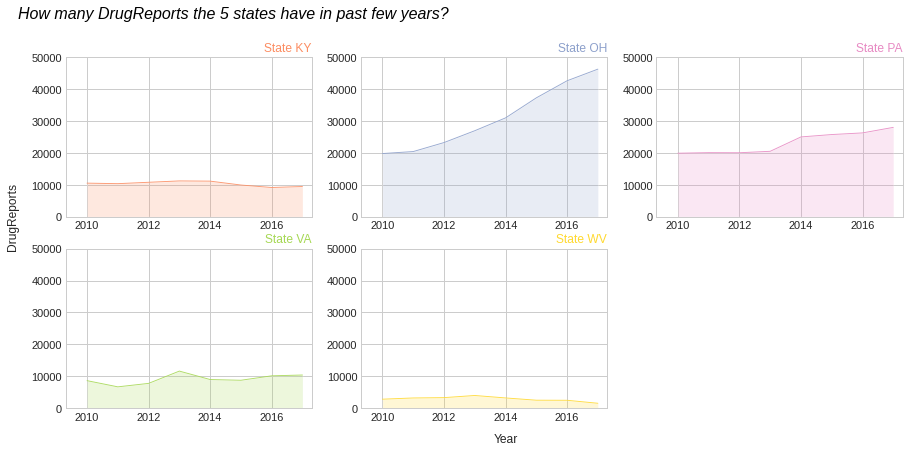

In [174]:
group = ds.groupby(['YYYY', 'State']).agg('sum').reset_index()
df = group.pivot(index = 'YYYY', columns = 'State', values = 'DrugReports').reset_index()

plt.style.use('seaborn-whitegrid')
palette = plt.get_cmap('Set2')
plt.figure(figsize = (15, 10))

num = 0
for col in df.drop('YYYY', axis = 1):
  num = num + 1
  plt.subplot(3, 3, num)
  
  # 线图
  plt.plot(df['YYYY'], df[col], marker = '',
           color = palette(num),
           lw = 0.9,
           alpha = 0.9,
           label = col)
  
  # 面积填充（让线条和填充颜色保持统一，透明度设为0.2）
  plt.fill_between(df['YYYY'], df[col], facecolor = palette(num), alpha = 0.2)

  plt.xlim(2009.3, 2017.3)
  plt.ylim(0,50000)

  plt.title('State ' + col, loc ='right', fontsize=12, fontweight=0, color=palette(num))

plt.suptitle("How many DrugReports the 5 states have in past few years?", 
             fontsize=16, fontweight=0, color='black', style='italic', 
             x = 0.28, y = 0.95)

plt.text(2014, -9500, 'Year', ha='center', va='center')
plt.text(1998, 60000, 'DrugReports', ha='center', va='center', rotation='vertical')

# 不同场景下的绘图案例

## 一、 展示趋势变化（Evolution）
1. 折线图 - Line Chart
2. 面积图 - Area Chart
3. 堆积面积图 - Stacked Area Chart

### 1.折线图 Line Chart
**注意事项**
1. X轴的数据必须是**有序**的
2. Y轴是否要从y=0开始
3. 如果要比较两个或者多个不同变量的变化趋势，不要使用双Y轴（尽量在一个Y轴下比较）
4. 图中线条太多会让图片混乱 => 可以考虑使用多子图

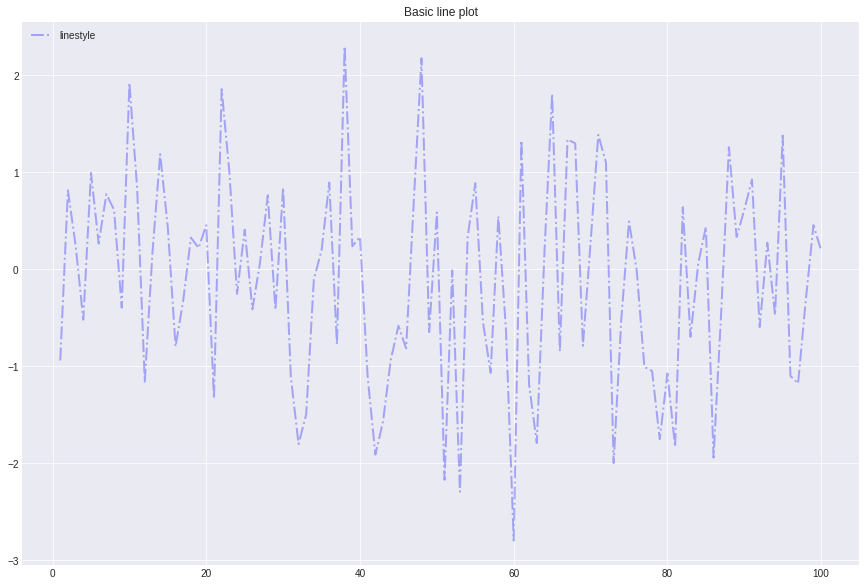

In [4]:
# 简单线图
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(
    {'xdata' : range(1, 101), 'ydata' : np.random.randn(100)}
)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (15, 10))

plt.plot('xdata', 'ydata', data = df, color = 'blue',
         alpha = 0.3, linestyle = '-.', linewidth = 2,
         label = 'linestyle')
plt.legend(loc = 'upper left', frameon = False)
plt.title('Basic line plot')
plt.show()

In [6]:
'''
多线图 
1. 突出某一个重点的多线图
  1. 一张图中，高亮重点线图，其他降色
  2. 多子图
'''

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Dataset = pd.read_csv('Drugs.csv')
Dataset

,YYYY,State,COUNTY,SubstanceName,DrugReports
0,2010,VA,ACCOMACK,Propoxyphene,1
1,2010,OH,ADAMS,Morphine,9
2,2010,PA,ADAMS,Methadone,2
3,2010,VA,ALEXANDRIA CITY,Heroin,5
4,2010,PA,ALLEGHENY,Hydromorphone,5
...,...,...,...,...,...
24057,2017,VA,WYTHE,Codeine,1
24058,2017,VA,WYTHE,Hydrocodone,19
24059,2017,VA,WYTHE,Tramadol,5
24060,2017,PA,YORK,ANPP,1


In [8]:
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index = 'YYYY', columns = 'State', values = 'DrugReports').reset_index()

In [11]:
print(df)
plt.style.use('seaborn-darkgrid')

State  YYYY     KY     OH     PA     VA    WV
0      2010  10453  19707  19814   8685  2890
1      2011  10289  20330  19987   6749  3271
2      2012  10722  23145  19959   7831  3376
3      2013  11148  26846  20409  11675  4046
4      2014  11081  30860  24904   9037  3280
5      2015   9865  37127  25651   8810  2571
6      2016   9093  42470  26164  10195  2548
7      2017   9394  46104  27894  10448  1614


Text(0, 0.5, 'DrugReports')

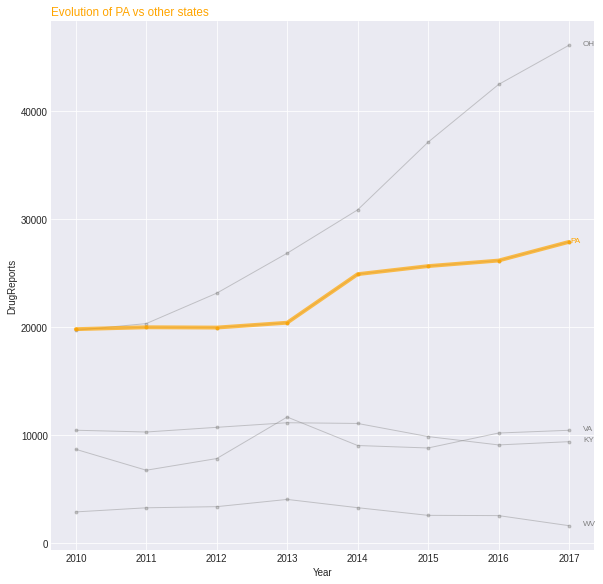

In [26]:
'''
一张图中，高亮重点线图，其他降色
'''
plt.figure(figsize = (10, 10), dpi = 70)

# 所有的线条都画成灰色

for col in df.drop('YYYY', axis = 1):
  # col = [KY, OH, PA, VA, WV]
  plt.plot(df['YYYY'], df[col], marker = '.', color = 'grey', lw = 1, alpha = 0.4)

# PA的线条特殊处理
plt.plot(df['YYYY'], df['PA'], marker = '.', color = 'orange', lw = 4, alpha = 0.7)

# 设定每条线label，普通线为灰色，重要的PA为橘色
num = 0
for i in df.values[7][1:]:
  num += 1
  name = list(df)[num]
  if name != 'PA': # (2017.2, i) => 选择2017因为Line的末尾端点 x = 2017, 2017.2在末尾端点的右侧
    plt.text(2017.2, i ,name, horizontalalignment = 'left', size = 'small', color = 'grey')

# 特殊处理PA
plt.text(2017.02, df.PA.tail(1), 'PA', horizontalalignment = 'left', size = 'small', color = 'orange')

plt.title('Evolution of PA vs other states',
          loc = 'left',
          fontsize = 12,
          fontweight = 0,
          color = 'orange')
plt.xlabel("Year")
plt.ylabel("DrugReports")

Text(1998, 60000, 'DrugReports')

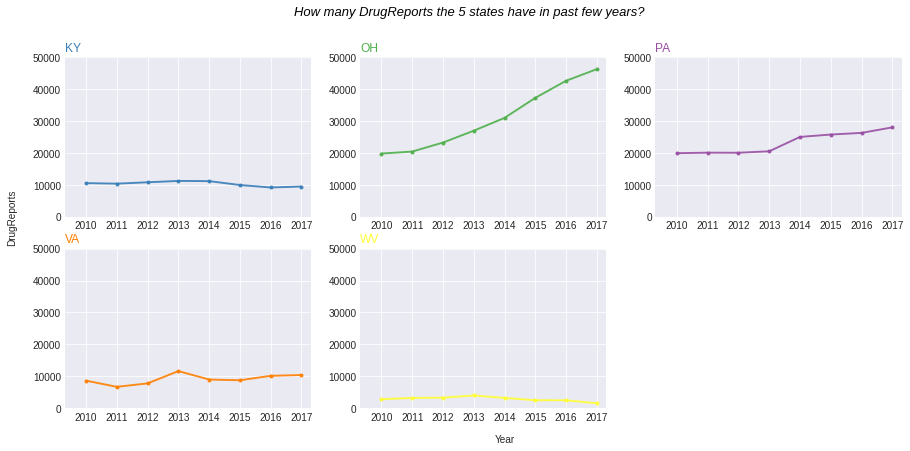

In [38]:
'''
多子图
1. 多个子图对比时，X轴和Y轴的刻度大小需要严格一致，不然会带来误导
'''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Dataset = pd.read_csv('Drugs.csv')
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index='YYYY', columns='State', values='DrugReports').reset_index()

plt.style.use('seaborn-darkgrid') 
palette = plt.get_cmap('Set1') # 颜色卡
plt.figure(figsize=(15, 10)) 

num = 0
for col in df.drop('YYYY', axis = 1):
  num = num + 1
  # 设定子图位置
  plt.subplot(3, 3, num) # 3 rows 3 cols num plot
  plt.plot(df['YYYY'], df[col], marker = '.', color = palette(num), lw = 1.9,
          alpha = 0.9, label = col)
  
  plt.xlim(2009.3, 2017.3)
  plt.ylim(0, 50000)

  plt.title(col, loc = 'left', fontsize = 12, fontweight = 0,
            color = palette(num))
  
plt.suptitle("How many DrugReports the 5 states have in past few years?", 
             fontsize=13, fontweight=0, color='black', style='italic', y=0.95)

plt.text(2014, -9500, 'Year', ha = 'center', va = 'center')
plt.text(1998, 60000, 'DrugReports', ha = 'center', va = 'center',
         rotation = 'vertical')

### 2.面积图 Area Chart
1. 相比Line Chart，填充了积分面积。可以更直观观察数据的变化趋势
**注意事项**
1. Y轴是否需要从0开始
2. 单一面积图 - 填充颜色为透明色，可以看到所有的线条
3. 堆积面积图 - 对比多个类比额
4. 线条和填充的颜色保持统一（填充的颜色设置一些透明度，图形更加美观）

**填充操作**
- 面积图 - `fill_between`
- 堆积面积图 - `stackplot`

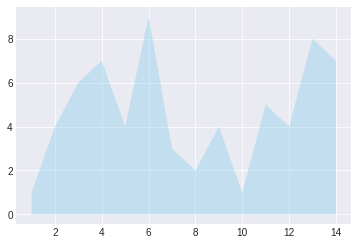

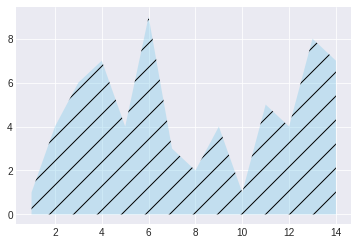

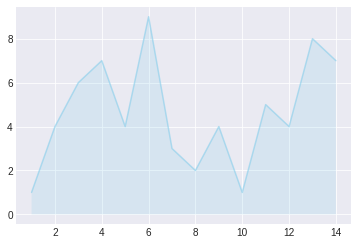

In [44]:
import numpy as np
import matplotlib.pyplot as plt

x = range(1, 15)
y=[1,4,6,7,4,9,3,2,4,1,5,4,8,7]

plt.fill_between(x, y, facecolor = 'skyblue', alpha = 0.4)
plt.show()

plt.fill_between(x, y, facecolor = 'skyblue', alpha = 0.4,
                 hatch = '/') # hatch应该填充阴影
plt.show()

plt.fill_between(x, y, facecolor = 'skyblue', alpha = 0.2)
plt.plot(x, y, color = 'skyblue', alpha = 0.6, lw = 1.5)
plt.show()

### 3. 堆叠面积图 - Stacked Area Chart
1. 折线图中折线可能交叉，堆积面积图中则有不同的数据点互相覆盖的情况
2. 通过相对高度来表达不同折线的趋势
3. 可以表示单个类比的趋势，也可以表达总体的发展趋势，也可以表示各个趋势之间的关系

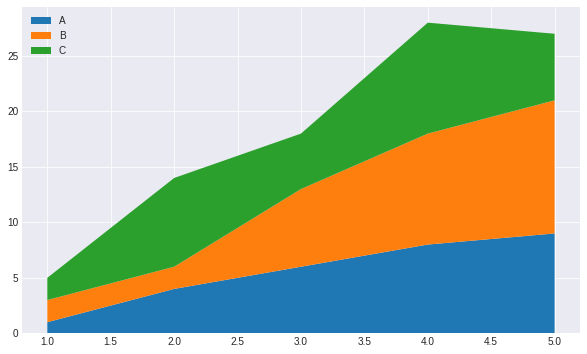

In [47]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10, 6))

# 方法一，三个序列组成y
x = range(1, 6)
y = [[1,4,6,8,9],[2,2,7,10,12],[2,8,5,10,6]]

plt.stackplot(x, y, labels = ['A', 'B', 'C'])
plt.legend(loc = 'upper left')
plt.show()

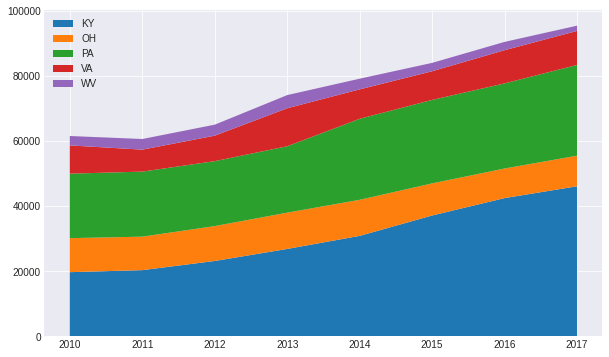

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Dataset = pd.read_csv('Drugs.csv')
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index='YYYY', columns='State', values='DrugReports').reset_index()

plt.style.use('seaborn-darkgrid') 
plt.figure(figsize=(10, 6)) 

plt.stackplot(df['YYYY'],df['KY'],df['OH'],df['PA'],df['VA'],df['WV'], 
              labels=df.iloc[:, 1:6].columns)
plt.legend(loc='upper left')
plt.show()

## 二、展示分布关系（Distribution）
1. 小提琴图 - Violin Plot
2. 箱图 - Boxplot
3. 直方图 - Histogram
4. 密度图 - Density

### 1.小提琴图 - Violin Plot
1. 展示多组数据的分布状态和概率密度（分别结合**Boxplot和Density**）

**注意事项**
1. 待展示数据组别要多
2. **按照中位数排序能让数据看起来更加直观**

In [55]:
import seaborn as sns
df = pd.read_csv('iris.csv')

In [56]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


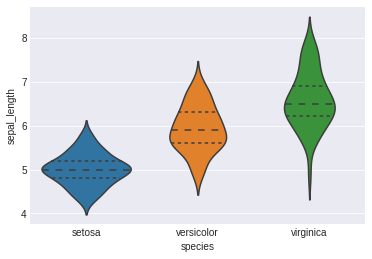

In [57]:
'''
x - 类别特征
y - 连续特征
inner - 显示四分位线
'''
sns.violinplot(x = df['species'],
               y = df['sepal_length'],
               inner = 'quartile')

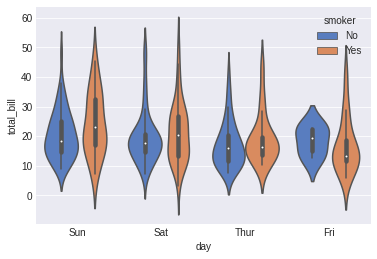

In [58]:
tips = pd.read_csv('tips.csv')
# 按照2个分类变量进行group
ax = sns.violinplot(x = 'day',
                    y = 'total_bill',
                    hue = 'smoker',
                    data = tips,
                    palette = 'muted')

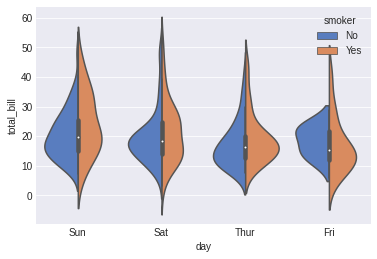

In [60]:
# 绘制分割的Violin spot来比较不同的色调变量

ax = sns.violinplot(x = 'day',
                    y = 'total_bill',
                    hue = 'smoker',
                    data = tips,
                    palette = 'muted',
                    split = True) # split进行分割绘制

### 2.箱形图 - Boxplot
- 超过上下四分位间距的值 $\notin$（Q1 - 1.5IQR, Q3 + 1.5IQR) 认定为异常值
- 粗略估计 偏态和尾重
- 数据的形状（中位数，尾长，异常值，分布区间）

**注意事项**
1. Boxplot隐藏了每个分组的数据量信息，可以通过**标注**或箱子宽度来展现
2. Boxplot隐藏了背后的分布信息
  - 数据量较少时可以使用Jitter
  - 数据量较多时使用Violin plot

In [64]:
import seaborn as sns
sns.set(style = 'whitegrid')
tips = pd.read_csv('tips.csv')

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


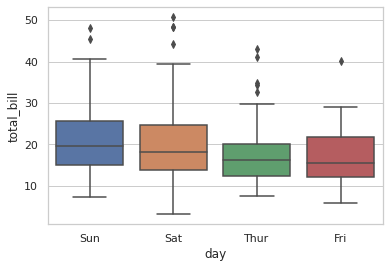

In [65]:
ax = sns.boxplot(x = 'day', y = 'total_bill', data = tips)

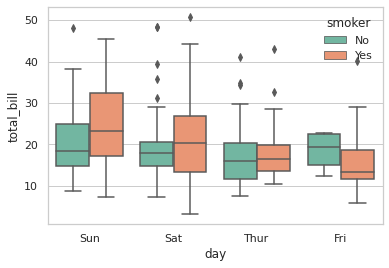

In [63]:
# 两个分类变量Group
# x, y, hue | names of variables in data or vector data, optional
ax = sns.boxplot(x = 'day', y = 'total_bill', hue = 'smoker',
      data = tips,
      palette = 'Set2')
ax = sns.boxplot(x = 'day', y =)

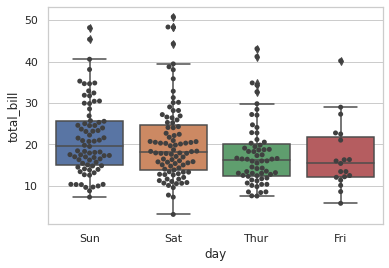

In [66]:
# swarmplot() 展示箱形图顶部的数据点
ax = sns.boxplot(x = 'day', y ='total_bill', data = tips)
ax = sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = '.25')

### 3.直方图 - Histogram
**注意事项**
1. 分箱数量的选择
2. 不要用直方图展示超过5个变量的分布情况
3. 避免使用彩色

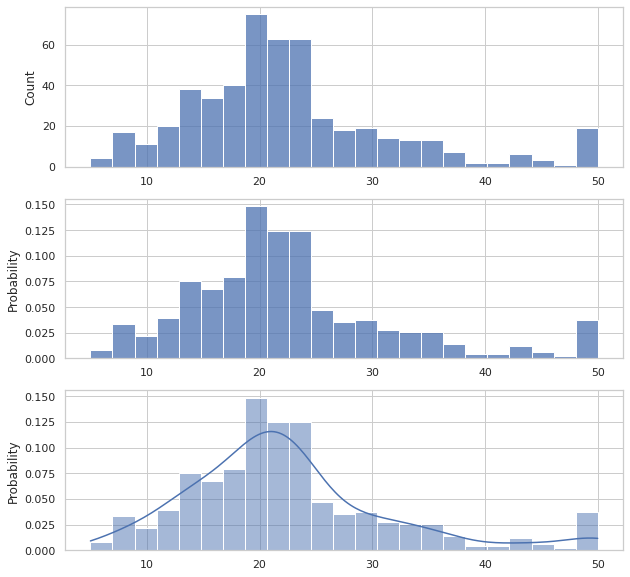

In [68]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
y = boston['target']

fig, axs = plt.subplots(3, 1, figsize = (10, 10))
sns.histplot(y, stat = 'count', ax = axs[0]) # 计数直方图
sns.histplot(y, stat = 'probability', ax = axs[1]) # 归一化直方图
'''
kde : if True, compute a [kernel density estimate] to smooth the distribution 
        and show on the plot as lines
'''
sns.histplot(y, stat = 'probability', kde = True, ax = axs[2]) # 在直方图上同时画出密度曲线


### 4.密度图 - Density

**注意事项**
1. 注意密度函数的width
2. 不要展示超过5个变量的分布情况
3. 避免使用彩色

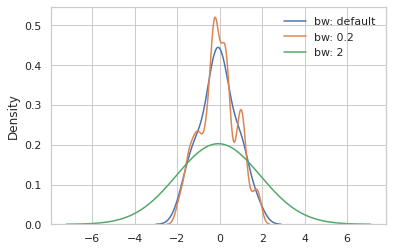

In [74]:
x = np.random.normal(size = 100)
sns.kdeplot(x, label = 'bw: default')
sns.kdeplot(x, bw_method = 0.2, label = 'bw: 0.2')
sns.kdeplot(x, bw_method = 2, label = 'bw: 2')
#   kdeplot() Method for determining the smoothing bandwidth 
# to use; passed to scipy.stats.gaussian_kde.
plt.legend()

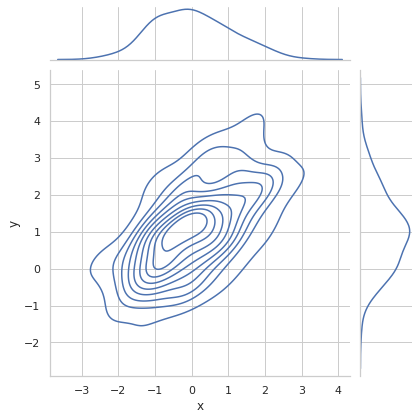

In [76]:
# KDE适用于二元的情况，以等高线展示
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns = ["x", "y"])

sns.jointplot(x = 'x', y = 'y', data = df, kind = 'kde')

## 三、 展示相关关系（Correlation）

1. 散点图 Scatter Plot
2. 热力图 Heatmap
3. 气泡图 Bubble Plot

### 1.散点图 - Scatter Plot
**注意事项**
1. 避免Overplotting => 样例点过多导致过度重合
  1. 通过Sample来作图
  2. 热力图代替
  3. 调节样本点的size

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('diamonds.csv').sample(1000)
df

,carat,cut,clarity,price
781,0.60,Ideal,VVS2,2860
2069,0.32,Premium,SI1,561
38771,0.31,Premium,VVS2,1046
43552,0.50,Ideal,VS1,1429
23608,1.52,Premium,SI1,11637
...,...,...,...,...
31744,0.40,Ideal,SI1,772
21591,1.51,Ideal,SI1,9694
39561,0.36,Ideal,VS2,1080
27163,2.64,Ideal,SI2,17407


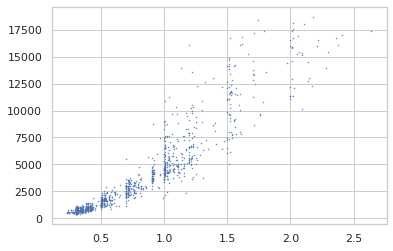

In [80]:
'''
s = 0.2
  scalar or array-like, shape (n, ), optional
'''
plt.scatter(df.carat, df.price, s = 0.2)

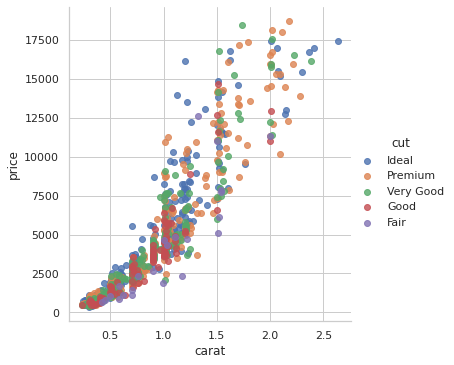

In [83]:
# 用颜色区别不同类别的散点
'''
x, y | string, optional
data | df
hue | Variables that define subsets of the data, which will be drawn
  on separate facets in the grid
fig_reg | If True, estimate and plot a regression model relating the x & y variables
'''
sns.lmplot(x = 'carat', y ='price', data = df, hue = 'cut', fit_reg = False)

### 2.热力图 - Heatmap
1. 相当于一个**二维分箱**操作

**注意事项**
1. 需要对数据做标准化的预处理（针对可能有长尾分布的情况）
2. 经常需要对数据先进行分箱再绘图

In [84]:
# 进行类别数量的统计
res = pd.crosstab(df.cut, df.clarity)

In [85]:
df, res

(       carat      cut clarity  price
 781     0.60    Ideal    VVS2   2860
 2069    0.32  Premium     SI1    561
 38771   0.31  Premium    VVS2   1046
 43552   0.50    Ideal     VS1   1429
 23608   1.52  Premium     SI1  11637
 ...      ...      ...     ...    ...
 31744   0.40    Ideal     SI1    772
 21591   1.51    Ideal     SI1   9694
 39561   0.36    Ideal     VS2   1080
 27163   2.64    Ideal     SI2  17407
 13838   1.09  Premium     SI1   5640
 
 [1000 rows x 4 columns], clarity    I1  IF  SI1  SI2  VS1  VS2  VVS1  VVS2
 cut                                              
 Fair        5   0    5    7    4    1     1     0
 Good        1   1   31   24    9   19     2     7
 Ideal       1  25   90   50   61  107    28    59
 Premium     3   3   65   55   37   72     7    21
 Very Good   3   4   56   29   25   48    10    24)

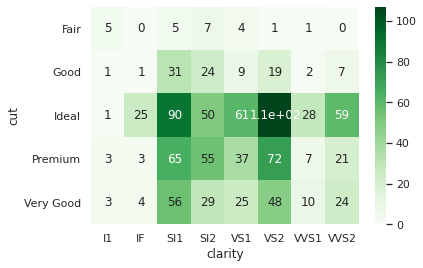

In [89]:
#annot 显示每个区域的数字
sns.heatmap(res, cmap = 'Greens', annot = True)

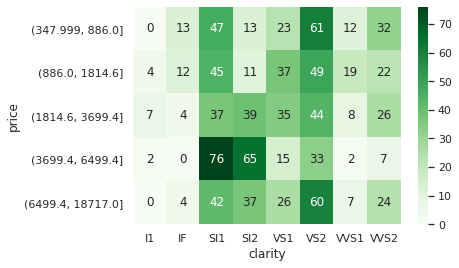

In [90]:
# 类别变量和数值变量分箱统计
'''
pd.qcut Quantile-based discretization function.
不同于pd.cut(), pd.qcut()基于分位数进行分割
'''
res = pd.crosstab(pd.qcut(df.price, 5), df.clarity)
sns.heatmap(res, cmap = 'Greens', annot = True)

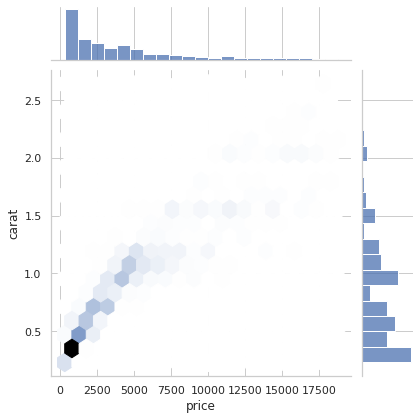

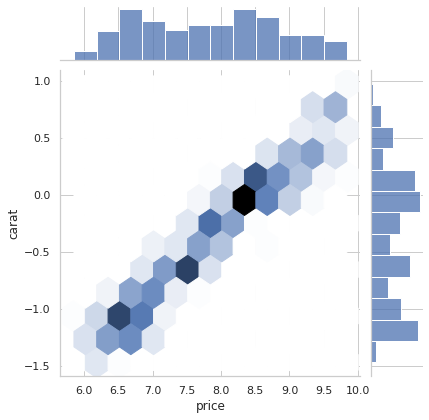

In [92]:
# 数值变量之间的密度图
'''
长尾分布：在第一张图中，因为原来的图有显著的长尾分布特征，所以导致密度图的偏向性很高
- 解决方案
 - 对数变换
 - 分位数截断
 - 标准差截断
'''
sns.jointplot(x = df['price'], y = df['carat'], kind = 'hex')
sns.jointplot(x=np.log(df["price"]), y=np.log(df["carat"]), kind='hex') # 对数变换

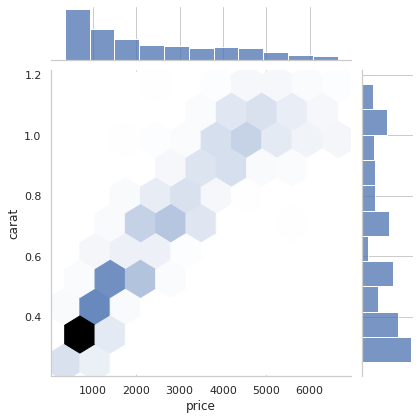

In [93]:
# 标准差截断
s1, s2 = df.price, df.carat
s1 = s1.mask((s1>(s1.median()+1*s1.std()))|(s1<(s1.median()-s1.std())))
s2 = s2.mask((s2>(s2.median()+1*s2.std()))|(s2<(s2.median()-s2.std())))
sns.jointplot(x = s1, y = s2, kind = 'hex')

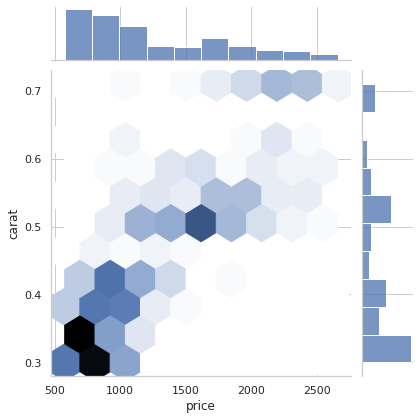

In [94]:
# 使用分位数截断
s1, s2 = df.price, df.carat
s1 = s1.mask((s1>(s1.quantile(0.5)))|(s1<(s1.quantile(0.05))))
s2 = s2.mask((s2>(s2.quantile(0.5)))|(s2<(s2.quantile(0.05))))
sns.jointplot(x=s1, y=s2, kind='hex')

### 3.气泡图 - Bubble Plot
1. 可以认为是Scatter Plot的衍生
2. 用来表示（高维数据），位置用(x,y)表示
  - 第三维 ｜ 第四维 => 气泡的颜色和大小

**注意事项**
1. 使用气泡面积而不是气泡的直径作为数值指标对比
  > 另外，气泡的大小是映射到面积而不是半径或者直径绘制的。因为如果是基于半径或者直径的话，圆的大小不仅会呈指数级变化，而且还会导致视觉误差。
2. 和散点图类似，气泡图同样要注意overplotting的问题

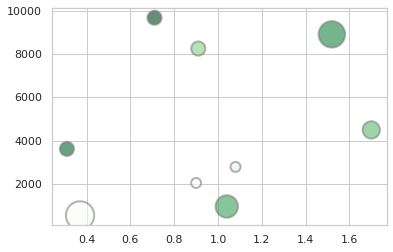

In [97]:
# 用（颜色，尺寸）控制第三、第四维度
new_feature1 = np.random.randint(0, 10, 10) # 气泡大小显示该 Feature 大小
new_feature2 = np.random.randint(0, 10, 10) # 颜色深浅显示该 Feature 大小

plt.scatter(df.carat.sample(10), df.price.sample(10),
            s = new_feature1 * 100,
            c = new_feature2,
            cmap = 'Greens',
            alpha = 0.6,
            edgecolors = 'grey',
            lw = 2)

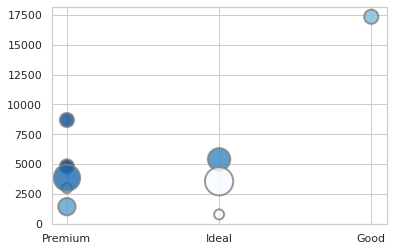

In [98]:
plt.scatter(df.cut.sample(10), df.price.sample(10),
            s = new_feature1 * 100,
            c = new_feature2,
            cmap = 'Blues',
            alpha = 0.8,
            edgecolors = 'grey',
            lw = 2)

## 四、 展示排序信息（Ranking）
1. 柱状图 - Barplot
2. 雷达图 - Radar
3. 平行坐标图 - Parallel Coordinates
4. 棒棒糖图 - Lollipop
5. 圆形柱状图 - Circular Barplot

### 1.柱状图 - Barplot

**注意事项**
1. 不要和直方图混淆，**直方图是同一个变量，分箱后得到的，用来评估该变量的分布，柱状图是单纯的表示类别数量和数值数量之间关系的图片**
2. 类别标签较长时，可以采用**横向柱状图**
3. 给柱子**排序**通常更有利于展示信息

       #                   Name   Type 1  ... Speed  Generation  Legendary
0      1              Bulbasaur    Grass  ...    45           1      False
1      2                Ivysaur    Grass  ...    60           1      False
2      3               Venusaur    Grass  ...    80           1      False
3      3  VenusaurMega Venusaur    Grass  ...    80           1      False
4      4             Charmander     Fire  ...    65           1      False
..   ...                    ...      ...  ...   ...         ...        ...
795  719                Diancie     Rock  ...    50           6       True
796  719    DiancieMega Diancie     Rock  ...   110           6       True
797  720    HoopaHoopa Confined  Psychic  ...    70           6       True
798  720     HoopaHoopa Unbound  Psychic  ...    80           6       True
799  721              Volcanion     Fire  ...    70           6       True

[800 rows x 13 columns]


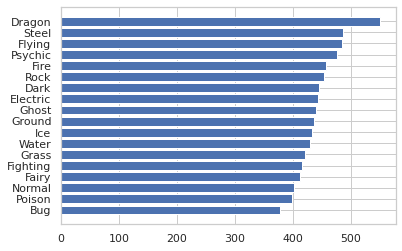

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pokemon = pd.read_csv('pokemon.csv')
print(pokemon)
data = pokemon.groupby('Type 1')['Total'].mean().sort_values(ascending = True).reset_index()

bars = data['Type 1']
pos = np.arange(len(bars))
plt.barh(pos, data['Total'])
plt.yticks(pos, bars)
plt.show()

### 2.雷达图 - Radar
**注意事项**
1. 不要在一张图显示超过5个组别
2. 不同组别标度差别很大时，谨慎使用了雷达图

   #        Name Type 1  Type 2  ...  Sp. Def  Speed  Generation  Legendary
0  1   Bulbasaur  Grass  Poison  ...       65     45           1      False
4  4  Charmander   Fire     NaN  ...       50     65           1      False

[2 rows x 13 columns]
[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982989, 0.0]


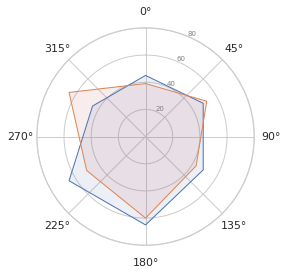

In [123]:
'''
使用 极坐标系 + 多边形填充 绘制雷达图
'''
from math import pi
# 绘制背景，选择两只pokemon，比较六维属性

data = pokemon.loc[[0, 4]]
print(data)
categories = ['HP', 'Attack', 'Defense', ' Sp. Atk', 'Sp. Def', 'Speed']
N = 6
angles = [n / float(N) * 2 * pi for n in range(N)] # 2\pi * \frac{n}{N}
angles += angles[:1]
print(angles)
ax = plt.subplot(111, polar = True) # 1 row, 1 col, first plot
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.yticks([20, 40, 60, 80], ["20", "40", "60", "80"],
           color = 'grey',
           size = 7)
plt.ylim(0, 80)

# 添加两个变量的雷达曲线
values= data.loc[0, ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP']]
ax.plot(angles, values, lw = 1, linestyle = 'solid', label = data.loc[0, 'Name'])
ax.fill(angles, values, 'b', alpha = 0.1)

values= data.loc[4, ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP']]
ax.plot(angles, values, lw = 1, linestyle = 'solid', label = data.loc[4, 'Name'])
ax.fill(angles, values, 'r', alpha = 0.1)

### 3.平行坐标图 - Parallel Coordinates
样本在一组数值型变量上的特征，是雷达图的另一种表现形式

**注意事项**
1. 不适合用于组别过多的情况
2. 可以在X轴对数据排序，避免曲线之间的交叉

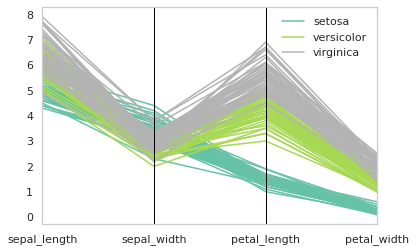

In [124]:
from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('iris.csv')

parallel_coordinates(data, 'species', colormap = plt.get_cmap('Set2'))
plt.show()

### 4.棒棒糖图 - Lollipop
视觉效果更好的柱状图

**注意事项**
1. 排序会使得显示效果更好
2. 无法排序 => 选择柱状图

Text(0, 0.5, 'Type')

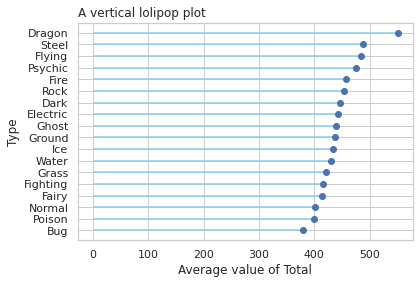

In [127]:
data = pokemon.groupby('Type 1')['Total'].mean().reset_index()

data = data.sort_values(by = 'Total')
my_range = range(1, len(data.index) + 1)
plt.hlines(y = my_range, xmin = 0, xmax = data['Total'], color = 'skyblue')
plt.plot(data['Total'], my_range, 'o')
plt.yticks(my_range, data['Type 1']) # y 轴
plt.title('A vertical lolipop plot', loc = 'left')
plt.xlabel('Average value of Total')
plt.ylabel('Type')

### 5.圆形柱状图 - Circular Barplot
1. 优点：展示突出类别，更吸引眼球
2. 缺点；更难判断柱子尺寸的差别
**注意事项**
1. 内圈的比例不能太小，一定要超过外圈的三分之一
2. 通常只有**很多类别**需要展示时才会用到（>40）

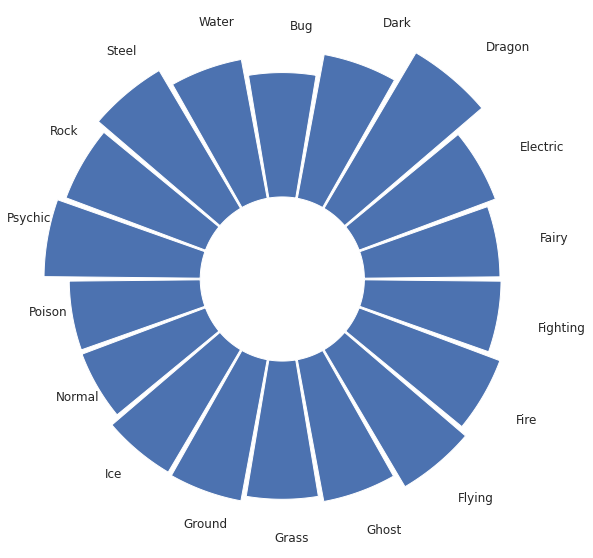

In [133]:
'''
通过 极坐标系下的柱状图 + 内圈的圆 绘制
'''
data = pokemon.groupby('Type 1')['Total'].mean().reset_index()
N = len(data)
bottom = 250
value = data['Total']
theta = np.linspace(0.0, 2 * pi, N , endpoint = False)
width = (2 * pi)/N - 0.02 # interval
plt.figure(figsize = (16, 10))

ax = plt.subplot(111, polar = True)
bars = ax.bar(theta, value, width = width, bottom = bottom)
ax.set_theta_zero_location("N")
ax.set_theta_direction('clockwise') # 决定顺/逆时针
ticks = data['Type 1']
for theta, tick, value in zip(theta,ticks,value):
  ax.text(theta+0.03, value + 380, tick)

plt.axis('off')
plt.show()

## 五、 展示组成关系（Part of a whole）
1. 饼图 - Pie Chart
2. 甜甜圈图 - Donut Chart
3. 文氏图 - Venn Diagram
4. 树图 - Treemap

### 1.饼图 - Pie Chart

**注意事项**
1. 如果使用百分数，确保和为100%
2. 不要使用3D和图例，这会使图的阅读性更差

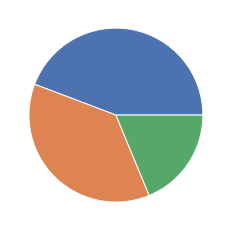

In [134]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3) * 4)
inner_colors = cmap(np.array([1,2,5,6,9,10]))

ax.pie(vals.sum(axis=1))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f644fbd1f28>],
      dtype=object)

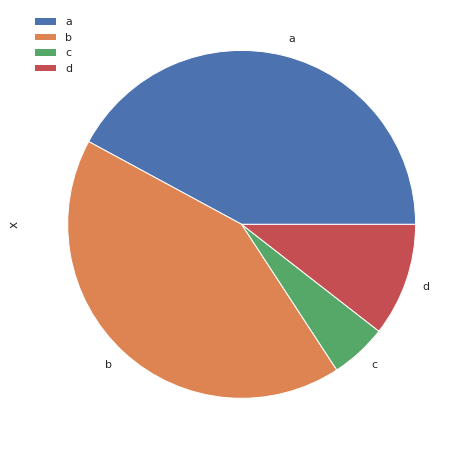

In [135]:
import pandas as pd
df = pd.DataFrame([8,8,1,2], index = ['a','b','c','d'], columns = ['x'])

df.plot(kind = 'pie', subplots = True, figsize = (8,8))

### 2.甜甜圈图 - Donut Chart
**注意事项**
同Pie Chart

在绘图使用可以在Pie Chart的基础上，中间画一个和底层画布相同的同心圆来mask

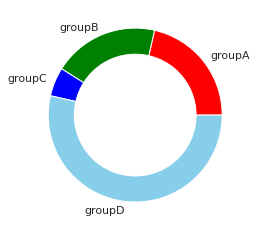

In [139]:
import matplotlib.pyplot as plt
names= 'groupA', 'groupB', 'groupC', 'groupD', # tuple
size = [12, 11, 3, 30]

# 中心处用一个和底色相同的白色圆进行遮罩
my_circle = plt.Circle((0,0), 0.7, color = 'white')

# 外围的Pie Chart
plt.pie(size, labels = names, colors = ['red', 'green', 'blue', 'skyblue'])
p = plt.gcf() # Get current Figure
p.gca().add_artist(my_circle)
plt.show()

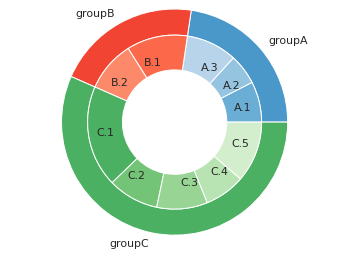

In [140]:
'''
有子分组的甜甜圈图
'''
import matplotlib.pyplot as plt
# 3 groups 7 subgroups
group_names = ['groupA', 'groupB', 'groupC']
group_size = [12, 11, 30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]

a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# Outside Ring
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius = 1.3, labels = group_names,
                  colors = [a(0.6), b(0.6), c(0.6)])
plt.setp(mypie, width = 0.3, edgecolor = 'white')

mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, 
                   labels=subgroup_names, 
                   labeldistance=0.7, 
                   colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

plt.show()

### 3.文氏图 - Venn Diagram
1. 不建议绘制超过3个集合的Venn图
2. 图中的数字指集合之间交集的元素个数

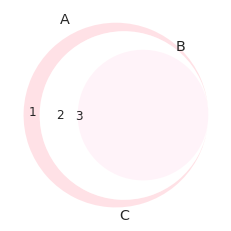

In [141]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
venn3(subsets=[set([3, 2, 1,4,5,6]),set([2,3,4]),set([1,2,3,4,5])], 
      set_labels=('A', 'B','C'),
      set_colors = ('lightpink','pink','pink'))

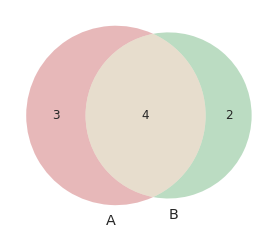

In [142]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
venn2(subsets=(3, 2,4,1), set_labels=('A', 'B'),set_colors = ('r','g'))

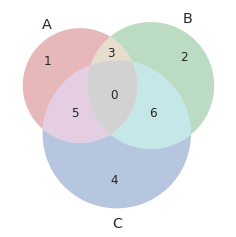

In [143]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
venn3(subsets=(1,2,3,4,5,6,0), set_labels=('A', 'B','C'),set_colors = ('r','g','b'))

### 4.树图 - Treemap
1. 嵌套句型，通过矩形的面积反应其取值大小
2. 充分利用空间，在有限的空间展示大量数据

**注意事项**
1. 不要在层次结构中注释超过3个级别
2. 优先考虑层次结构的最高层次

In [145]:
!pip install squarify

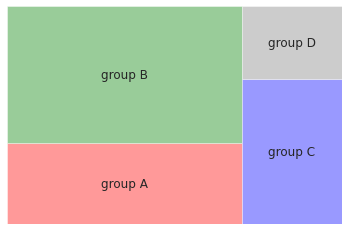

In [146]:
import matplotlib.pyplot as plt
import squarify

squarify.plot(sizes=[13,22,10,5], label=["group A", "group B", "group C", "group D"], color=["red","green","blue", "grey"], alpha=.4 )
plt.axis('off')
plt.show()

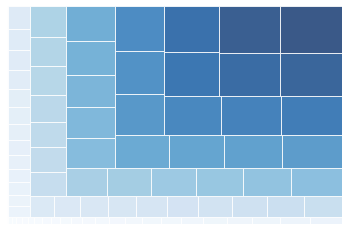

In [148]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify 

my_values=[i**3 for i in range(1,100)]

cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

squarify.plot(sizes=my_values, alpha=.8, color=colors )
plt.axis('off')
plt.show()